In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, 'src')

from neural_network import NeuralNetwork
from perceptron import Perceptron
from data_utils import load_dataset, visualize_samples, get_dataset_stats

print(" All imports successful!")

 All imports successful!


In [11]:
# Load digit datasets
print("Loading digit datasets...")
X_train_digits, y_train_digits = load_dataset('data/trainingimages', 'data/traininglabels', 28, 28)
X_test_digits, y_test_digits = load_dataset('data/testimages', 'data/testlabels', 28, 28)

# Load face datasets
print("Loading face datasets...")
X_train_faces, y_train_faces = load_dataset('data/facedatatrain', 'data/facedatatrainlabels', 70, 60)
X_test_faces, y_test_faces = load_dataset('data/facedatatest', 'data/facedatatestlabels', 70, 60)

print(" Data loaded successfully!")
print(f"Digits - Train: {X_train_digits.shape}, Test: {X_test_digits.shape}")
print(f"Faces - Train: {X_train_faces.shape}, Test: {X_test_faces.shape}")

Loading digit datasets...
Loading face datasets...
 Data loaded successfully!
Digits - Train: (5000, 784), Test: (1000, 784)
Faces - Train: (451, 4200), Test: (150, 4200)


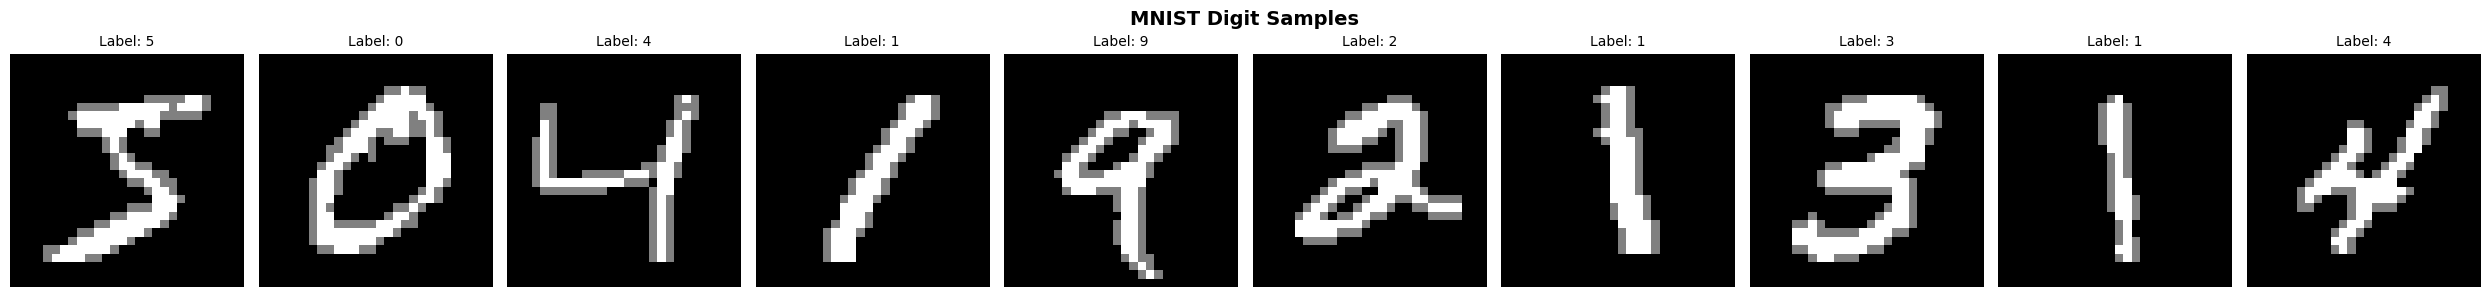

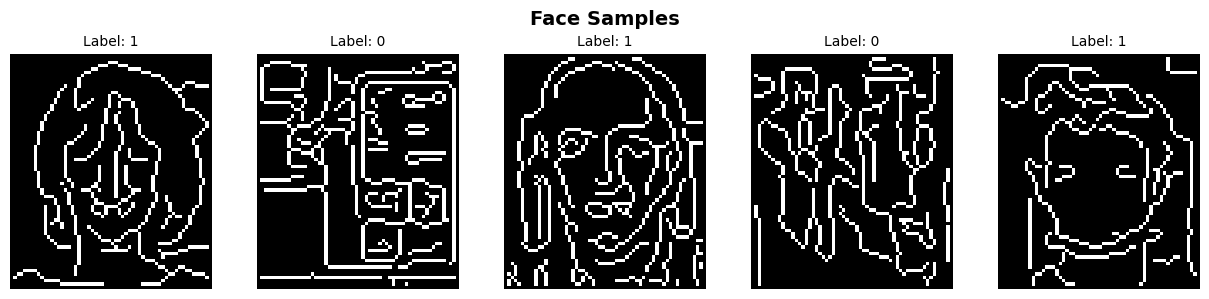

In [12]:
# Visualize some digit samples
visualize_samples(X_train_digits, y_train_digits, (28, 28), n=10, title="MNIST Digit Samples")

# Visualize some face samples
visualize_samples(X_train_faces, y_train_faces, (70, 60), n=5, title="Face Samples")

In [13]:
print("Training Perceptron on digits...")
perceptron = Perceptron(num_classes=10, learning_rate=0.05, max_epochs=10)
perceptron.train(X_train_digits, y_train_digits, verbose=True)

accuracy = perceptron.evaluate(X_test_digits, y_test_digits)
print(f"\n Perceptron Test Accuracy: {accuracy:.2f}%")

Training Perceptron on digits...
Epoch 1/10 - Errors: 1106/5000 (22.12%)
Epoch 2/10 - Errors: 737/5000 (14.74%)
Epoch 3/10 - Errors: 633/5000 (12.66%)
Epoch 4/10 - Errors: 567/5000 (11.34%)
Epoch 5/10 - Errors: 542/5000 (10.84%)
Epoch 6/10 - Errors: 505/5000 (10.10%)
Epoch 7/10 - Errors: 446/5000 (8.92%)
Epoch 8/10 - Errors: 434/5000 (8.68%)
Epoch 9/10 - Errors: 405/5000 (8.10%)
Epoch 10/10 - Errors: 381/5000 (7.62%)

 Perceptron Test Accuracy: 81.50%


Training Neural Network (NumPy) on digits...
Epoch 1/10 - Loss: 1.7200
Epoch 2/10 - Loss: 0.6673
Epoch 3/10 - Loss: 0.5038
Epoch 4/10 - Loss: 0.3991
Epoch 5/10 - Loss: 0.3370
Epoch 6/10 - Loss: 0.2809
Epoch 7/10 - Loss: 0.2470
Epoch 8/10 - Loss: 0.2098
Epoch 9/10 - Loss: 0.1874
Epoch 10/10 - Loss: 0.1746

 Neural Network (NumPy) Test Accuracy: 92.40%


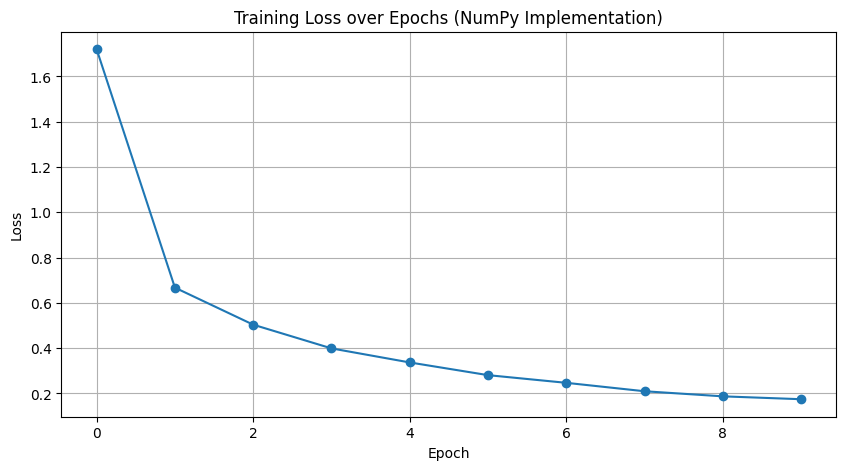

In [14]:
print("Training Neural Network (NumPy) on digits...")
nn_numpy = NeuralNetwork(
    input_dim=784, 
    num_classes=10,
    learning_rate=0.7,
    batch_size=32,
    use_torch=False
)

cost_history = nn_numpy.train(X_train_digits, y_train_digits, epochs=10, verbose=True)

accuracy = nn_numpy.evaluate(X_test_digits, y_test_digits)
print(f"\n Neural Network (NumPy) Test Accuracy: {accuracy:.2f}%")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(cost_history, marker='o')
plt.title('Training Loss over Epochs (NumPy Implementation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Training Neural Network (PyTorch) on digits...
Epoch 1/10 - Loss: 1.6741
Epoch 2/10 - Loss: 0.6952
Epoch 3/10 - Loss: 0.5020
Epoch 4/10 - Loss: 0.4053
Epoch 5/10 - Loss: 0.3388
Epoch 6/10 - Loss: 0.2849
Epoch 7/10 - Loss: 0.2501
Epoch 8/10 - Loss: 0.2170
Epoch 9/10 - Loss: 0.1911
Epoch 10/10 - Loss: 0.1680

 Neural Network (PyTorch) Test Accuracy: 90.90%


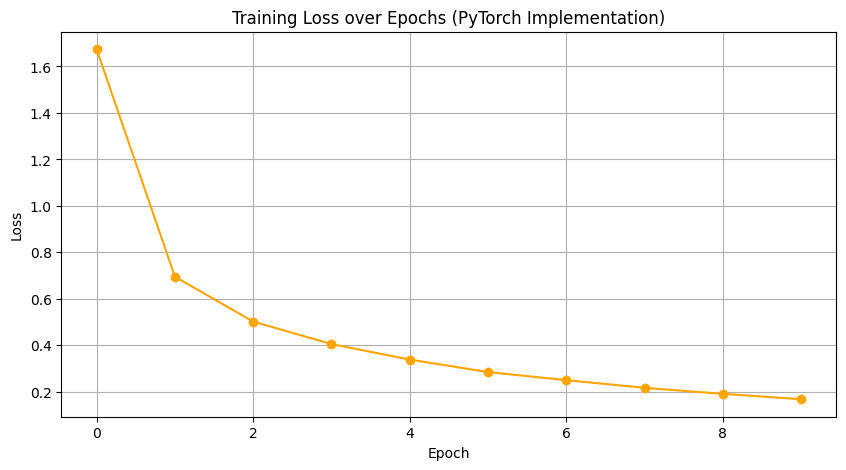

In [15]:
print("Training Neural Network (PyTorch) on digits...")
nn_torch = NeuralNetwork(
    input_dim=784, 
    num_classes=10,
    learning_rate=0.7,
    batch_size=32,
    use_torch=True
)

cost_history_torch = nn_torch.train(X_train_digits, y_train_digits, epochs=10, verbose=True)

accuracy = nn_torch.evaluate(X_test_digits, y_test_digits)
print(f"\n Neural Network (PyTorch) Test Accuracy: {accuracy:.2f}%")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(cost_history_torch, marker='o', color='orange')
plt.title('Training Loss over Epochs (PyTorch Implementation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

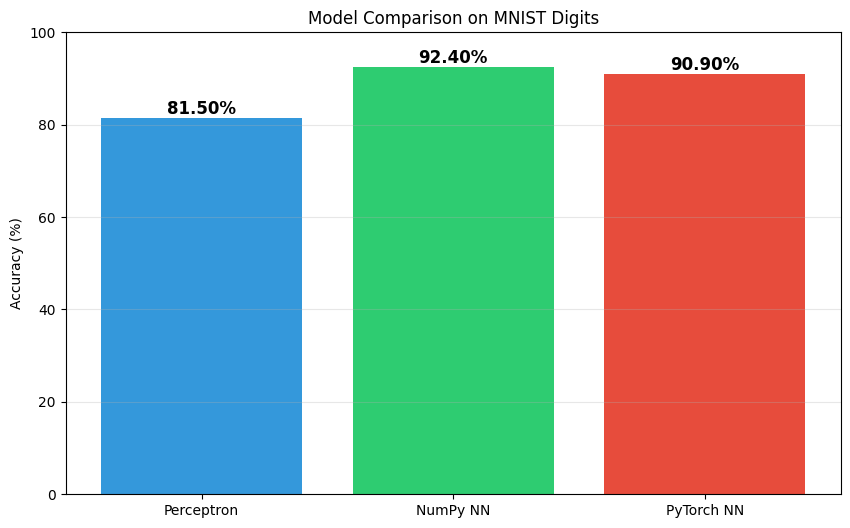


 Final Results Summary:
Perceptron     :  81.50%
NumPy NN       :  92.40%
PyTorch NN     :  90.90%


In [16]:
# Create a comparison
models = ['Perceptron', 'NumPy NN', 'PyTorch NN']
accuracies = [
    perceptron.evaluate(X_test_digits, y_test_digits),
    nn_numpy.evaluate(X_test_digits, y_test_digits),
    nn_torch.evaluate(X_test_digits, y_test_digits)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['#3498db', '#2ecc71', '#e74c3c'])
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison on MNIST Digits')
plt.ylim([0, 100])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n Final Results Summary:")
for model, acc in zip(models, accuracies):
    print(f"{model:15s}: {acc:6.2f}%")